In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

Using TensorFlow backend.


In [6]:
data = pd.read_csv('./HAM10000_metadata.csv')

In [7]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
lesion_id       10015 non-null object
image_id        10015 non-null object
dx              10015 non-null object
dx_type         10015 non-null object
age             9958 non-null float64
sex             10015 non-null object
localization    10015 non-null object
dtypes: float64(1), object(6)
memory usage: 547.8+ KB
None
               age
count  9958.000000
mean     51.863828
std      16.968614
min       0.000000
25%      40.000000
50%      50.000000
75%      65.000000
max      85.000000


In [8]:
print(data['dx_type'].unique())
print(data['dx'].unique())
print(data['sex'].unique())
print(data['localization'].unique())

['histo' 'consensus' 'confocal' 'follow_up']
['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec']
['male' 'female' 'unknown']
['scalp' 'ear' 'face' 'back' 'trunk' 'chest' 'upper extremity' 'abdomen'
 'unknown' 'lower extremity' 'genital' 'neck' 'hand' 'foot' 'acral']


[Text(0, 0, 'back'),
 Text(0, 0, 'lower extremity'),
 Text(0, 0, 'trunk'),
 Text(0, 0, 'upper extremity'),
 Text(0, 0, 'abdomen'),
 Text(0, 0, 'face'),
 Text(0, 0, 'chest'),
 Text(0, 0, 'foot'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'neck'),
 Text(0, 0, 'scalp'),
 Text(0, 0, 'hand'),
 Text(0, 0, 'ear'),
 Text(0, 0, 'genital'),
 Text(0, 0, 'acral')]

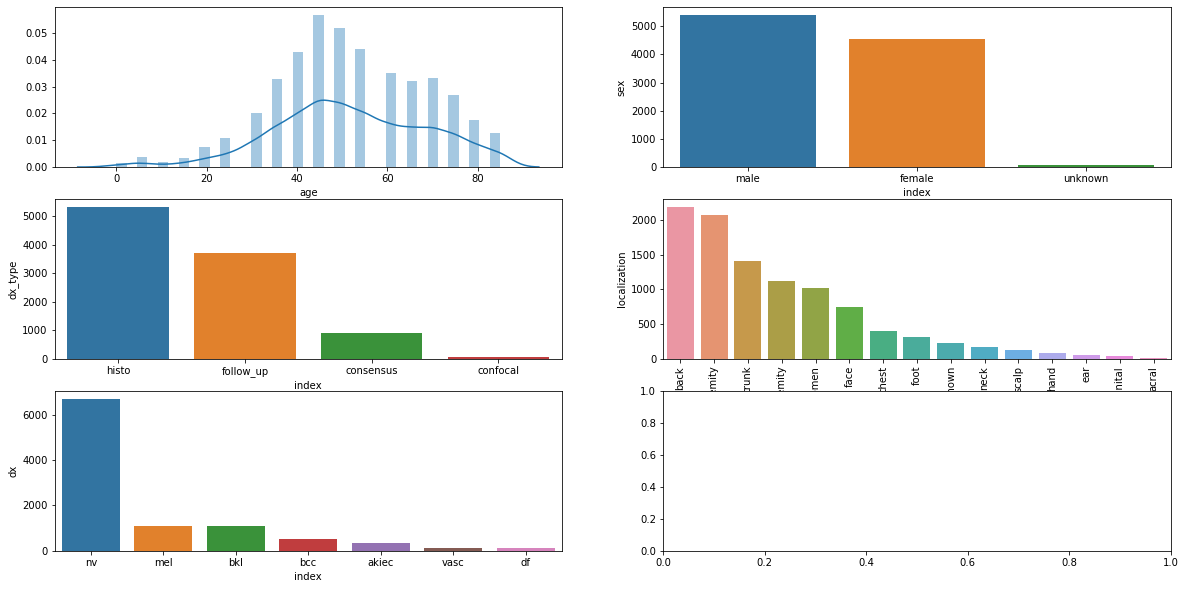

In [15]:
fig, ax = plt.subplots(3,2, figsize=(20,10))

sns.distplot(data['age'], ax=ax[0,0])
sns.barplot(data=data['dx_type'].value_counts().reset_index(), x='index', y='dx_type', ax=ax[1,0])
sns.barplot(data=data['dx'].value_counts().reset_index(), x='index', y='dx', ax=ax[2,0])
sns.barplot(data=data['sex'].value_counts().reset_index(), x='index', y='sex', ax=ax[0,1])
sns.barplot(data=data['localization'].value_counts().reset_index(), x='index', y='localization', ax=ax[1,1])
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation = 90)

In [16]:
data_pic = pd.read_csv('./hmnist_28_28_RGB.csv')


In [20]:
data_pic

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0


In [40]:
X = data_pic.drop(axis=1, columns='label')
y = data_pic['label']

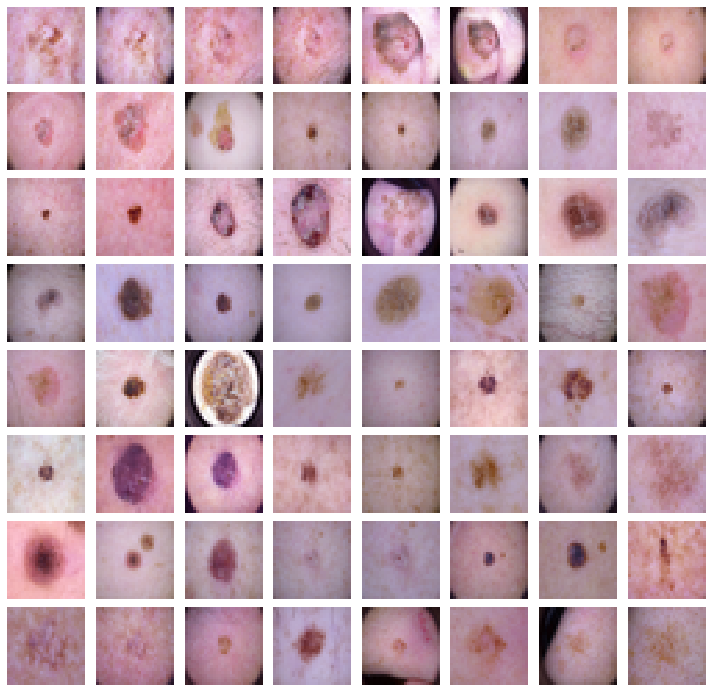

In [41]:
fig, (ax) = plt.subplots(8, 8, figsize = (10, 10))
k = 0 
for i in range(8):
    for j in range(8):
        ax[i,j].imshow(X.loc[k].values.reshape(28,28,3))
        ax[i,j].axis('off')
        k += 1  
    plt.tight_layout()

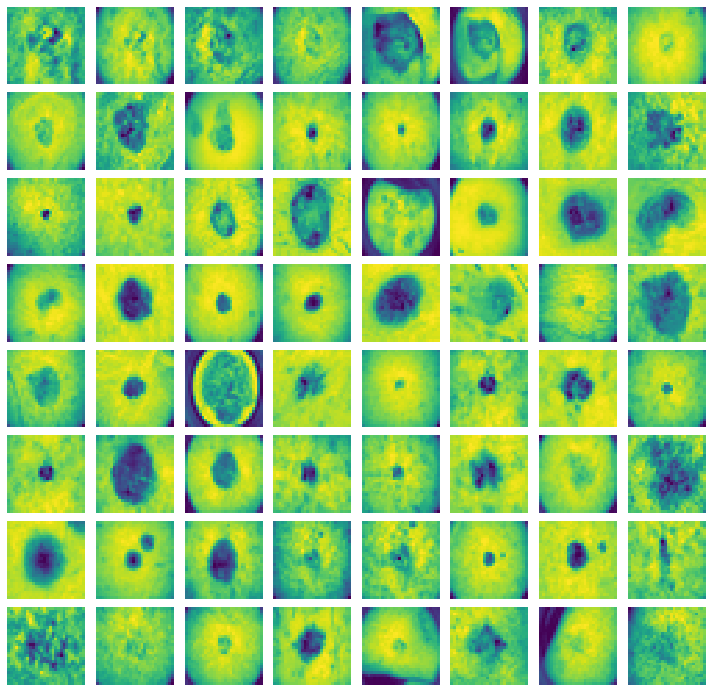

In [38]:
data_pic2 = pd.read_csv('./hmnist_28_28_L.csv')
picture2 = data_pic2.drop(axis=1, columns='label')

fig, (ax) = plt.subplots(8, 8, figsize = (10, 10))
k = 0 
for i in range(8):
    for j in range(8):
        ax[i,j].imshow(picture2.loc[k].values.reshape(28,28))
        ax[i,j].axis('off')
        k += 1  
    plt.tight_layout()

___

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
X_train = X_train.values.reshape(X_train.shape[0], 28, 28, 3)
X_test = X_test.values.reshape(X_test.shape[0], 28, 28, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [47]:
X_train /= 255
X_test /= 255

In [50]:
n_classes = 7
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (8012,)
Shape after one-hot encoding:  (8012, 7)


In [52]:
# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,3)))
model.add(MaxPool2D(pool_size=(1,1))) 
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(7, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Train on 8012 samples, validate on 2003 samples
Epoch 1/10
8012/8012 [==============================] - 8s 1000us/step - loss: 1.1990 - accuracy: 0.6530 - val_loss: 0.9411 - val_accuracy: 0.6695
Epoch 2/10
8012/8012 [==============================] - 8s 1ms/step - loss: 0.8876 - accuracy: 0.6870 - val_loss: 0.9025 - val_accuracy: 0.6795
Epoch 3/10
8012/8012 [==============================] - 8s 948us/step - loss: 0.8223 - accuracy: 0.7022 - val_loss: 0.8341 - val_accuracy: 0.7000
Epoch 4/10
8012/8012 [==============================] - 8s 1ms/step - loss: 0.7752 - accuracy: 0.7208 - val_loss: 0.8106 - val_accuracy: 0.7039
Epoch 5/10
8012/8012 [==============================] - 8s 1ms/step - loss: 0.7248 - accuracy: 0.7350 - val_loss: 0.7857 - val_accuracy: 0.7144
Epoch 6/10
8012/8012 [==============================] - 8s 961us/step - loss: 0.6988 - accuracy: 0.7469 - val_loss: 0.7765 - val_accuracy: 0.7199
Epoch 7/10
8012/8012 [==============================] - 8s 985us/step - loss: 0.6

In [53]:
# building a linear stack of layers with the sequential model
model = Sequential()

# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(28,28,3)))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Train on 8012 samples, validate on 2003 samples
Epoch 1/10
8012/8012 [==============================] - 62s 8ms/step - loss: 1.0995 - accuracy: 0.6596 - val_loss: 0.9949 - val_accuracy: 0.6680
Epoch 2/10
8012/8012 [==============================] - 69s 9ms/step - loss: 0.9602 - accuracy: 0.6686 - val_loss: 0.9032 - val_accuracy: 0.6645
Epoch 3/10
8012/8012 [==============================] - 57s 7ms/step - loss: 0.8926 - accuracy: 0.6749 - val_loss: 0.8790 - val_accuracy: 0.6700
Epoch 4/10
8012/8012 [==============================] - 59s 7ms/step - loss: 0.8675 - accuracy: 0.6829 - val_loss: 0.8432 - val_accuracy: 0.6905
Epoch 5/10
8012/8012 [==============================] - 64s 8ms/step - loss: 0.8331 - accuracy: 0.6912 - val_loss: 0.8295 - val_accuracy: 0.6850
Epoch 6/10
8012/8012 [==============================] - 57s 7ms/step - loss: 0.8086 - accuracy: 0.7018 - val_loss: 0.8138 - val_accuracy: 0.6960
Epoch 7/10
8012/8012 [==============================] - 55s 7ms/step - loss: 0.770

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 50)        1400      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 75)        33825     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 75)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 125)       84500     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 125)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 125)        

In [58]:
eval = model.evaluate(X_test, Y_test)

print('test loss, test acc: ' + str(eval[0]) + ', '+ str(eval[1]))

2003/2003 [==============================] - 4s 2ms/step
test loss, test acc: 0.7419326244683725, 0.7343984246253967
